In [2]:
import pandas as pd
import requests
import pyproj
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import PillowWriter, FuncAnimation
from matplotlib import rc, animation
from mapclassify import NaturalBreaks
from IPython import display 

from fonction import ligne, nom_de_colonne, carte_1_an_rapide, carte_1_an, carte_1_an_bis, region_sans_dom, academie_sans_dom ,carte_fest_marche, lecture_fichier, data_1_an, carte_fest, hist_date_festi, hist_date_pano, into_md, carte_fest_debug, festi_sans_dom, festi_sans_dom_shapefile, make_fond_carte

In [3]:
#Lecture du fichier voulu
festi = lecture_fichier("festival", "csv")
shp_festi = lecture_fichier("festival", "shp")
fond_de_carte = lecture_fichier("carte_region", "shp")

#convertit le fichier shp complet en un fichier sans dom tom
shp_sans_dom = festi_sans_dom_shapefile(shp_festi)
reg_sans_dom = region_sans_dom(fond_de_carte)

print(len(shp_sans_dom))

#On convertit la colonne année de création en numéric et on drop les na de cette colonne
shp_sans_dom['annee_de_cr'] = pd.to_numeric(shp_sans_dom['annee_de_cr'], errors='coerce')
#On drop les na
shp_sans_dom = shp_sans_dom.dropna(subset=['annee_de_cr'])
#On convertit les années en entiers
shp_sans_dom['annee_de_cr'] = shp_sans_dom['annee_de_cr'].astype(int)
#On suprime les entiers de + de 4 chiffres
shp_sans_dom = shp_sans_dom[shp_sans_dom['annee_de_cr'].astype(str).str.len() <= 4]

#On regarde les différentes valeurs présentes dans notre colonne année de création:
print(shp_sans_dom['annee_de_cr'].unique())
print(len(shp_sans_dom))


7117
[2013 2011 1997 2001 2016 2007 1983 2015 2010 2012 2019 2004 2014 1999
 2002 1981 2005 1988 2009 1992 2006 1998 1977 2003 1989 2017 1975 1995
 1991 1996 2018 2008 2000 2020 1958 1985 1982 1965 1969 1984 1980 1986
 1974 1990 1954 1978 1994 1970 1987 1993 2021 1960 1976 1948 1966 1973
 1979 1971 1944 1967 1952 1951 1949 2022 1935 1964 1959 1961 1968 1947
 1905 1869 1972 1604 1874 1946 1950 1957 1962 1920 1930 1923]
5410


C:\Users\lilou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [4]:
print(shp_sans_dom)

                           nom_du_fest  code_postal code_insee_  \
1        Jours [et nuits] de cirque(s)      13090.0   200054807   
2         Les nuits mÃ©diterranÃ©ennes      20250.0   242010056   
3       Festival Pause guitare Ã  Albi      81000.0   248100737   
4        Festival Les EchapÃ©es Belles      61000.0   246100663   
5                  LadyFest d'AlenÃ§on      61000.0   246100663   
...                                ...          ...         ...   
7269  Rencontres musicales de VÃ©zelay      89400.0   200039758   
7274                 Festival d'humour       1450.0   240100883   
7275             Festival Villy-Bocage      14310.0   200069524   
7276                      Festival Ado      14500.0   200068799   
7278                 Le chant des sucs      43200.0   244301016   

          decennie_de  annee_de_cr identifiant                   geometry  
1      2010 et aprÃ¨s         2013        None   POINT (5.39857 43.53607)  
2      2010 et aprÃ¨s         2011        N

In [5]:
#Génere le fond de carte tout seul
def make_fond_carte(fond_de_carte):
    # défini la figure
    fig, ax = plt.subplots(figsize=(12, 6))
    # plot le fonde de carte de la France
    fond_de_carte.plot(ax=ax, color='lightgray', edgecolor='black')
    return ax

In [6]:
#Génere une carte de la france avec les emplacements des festivals 
# Cette fonction marche si on a déja convertit les valeurs en numérique et remplacé toutes les valeurs qui ne sont pas numériques par des NaN

def carte(emplacements_festivals, ax, annee):
    # On enlève les lignes dont la date de création est différente de celle donnée en argument
    emplacements = emplacements_festivals[emplacements_festivals['annee_de_cr'] == annee]

    if not emplacements.empty:
        # On affiche les emplacements des festivals
        layer = emplacements.plot(ax=ax, color='red', marker='o', markersize=5)

        return layer

    return ax


In [7]:
def carte_1_an_bis(emplacements_festivals, fond_de_carte, annee):
    # On enlève toutes les lignes dont la valeur de la colonne 'code_insee_commune' est NaN

    # On enlève les lignes dont la date de création est différente de celle donnée en argument
    emplacements_festivals = emplacements_festivals[emplacements_festivals['annee_de_cr'] == annee]

    if not emplacements_festivals.empty:
        fig, ax = plt.subplots(figsize=(12, 6))

        # Afficher le fond de carte
        fond_de_carte.plot(ax=ax, color='lightgray', edgecolor='black')

        # Afficher les emplacements des festivals
        emplacements_festivals.plot(ax=ax, color='red', marker='o', markersize=5)

        # Ajouter un titre à la carte
        plt.title(f'Carte des Festivals en France créés en {annee}')

        # Afficher la carte
        plt.show()

        return

    # Si aucuns festivals n'ont été créés cette année, afficher seulement le fond de carte
    fig, ax = plt.subplots(figsize=(12, 6))
    fond_de_carte.plot(ax=ax, color='lightgray', edgecolor='black')
    plt.title(f'Aucun festival créé en France en {annee}')
    plt.show()
    return

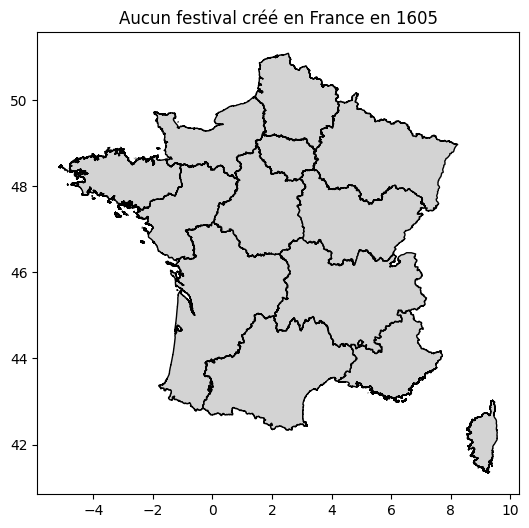

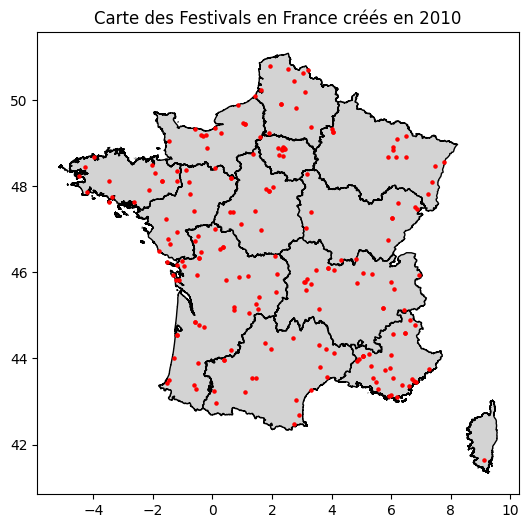

In [8]:
carte_1_an_bis(shp_sans_dom, reg_sans_dom, 1605)
carte_1_an_bis(shp_sans_dom, reg_sans_dom, 2010)

Axes(0.311808,0.11;0.401385x0.77)


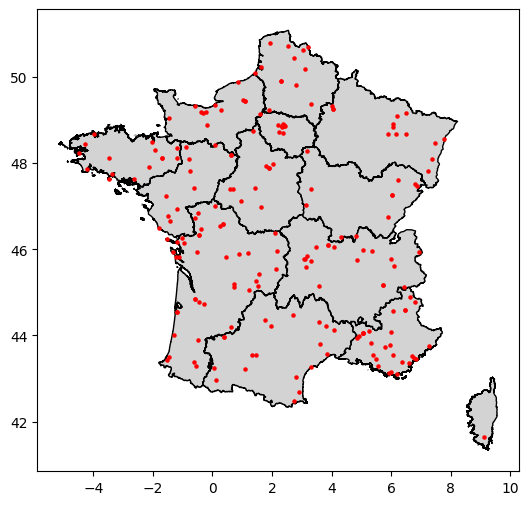

In [9]:
#On affiche la carte d'une année en utilisant la méthode plus rapide de créer la fond de carte en dehors de la fonction

ax = make_fond_carte(reg_sans_dom)
layer = carte(shp_sans_dom, ax, 2010)

print(layer)

In [9]:
print(shp_sans_dom['annee_de_cr'].unique())
print(shp_sans_dom['annee_de_cr'].max())

[2013 2011 1997 2001 2016 2007 1983 2015 2010 2012 2019 2004 2014 1999
 2002 1981 2005 1988 2009 1992 2006 1998 1977 2003 1989 2017 1975 1995
 1991 1996 2018 2008 2000 2020 1958 1985 1982 1965 1969 1984 1980 1986
 1974 1990 1954 1978 1994 1970 1987 1993 2021 1960 1976 1948 1966 1973
 1979 1971 1944 1967 1952 1951 1949 2022 1935 1964 1959 1961 1968 1947
 1905 1869 1972 1604 1874 1946 1950 1957 1962 1920 1930 1923]
2022


In [ ]:
# Définir le nombre total d'années pour l'animation
annee_min = 2015
annee_max = 2020

total_years = annee_max - annee_min + 1
print("total_years=", total_years)


#On importe le fond de carte de la France
ax = make_fond_carte(reg_sans_dom)

#On initialise la figure
fig, ax = plt.subplots(figsize=(8, 6))
reg_sans_dom.boundary.plot(ax=ax)

def update(frame):
    #ax.clear()
    reg_sans_dom.boundary.plot(ax=ax)
    print("annee", annee_min + frame)
    
    # Appeler votre fonction existante pour afficher la carte pour une année spécifique
    layer = carte(shp_sans_dom, ax, annee_min + frame)
    print("...")
    ax.set_title(f'Année {annee_min + frame}')
    return [layer]
    #ax.set_aspect('equal')


# Création de l'animation
anim = FuncAnimation(fig, update, frames=total_years, repeat=False)

writer = PillowWriter(fps=1)
anim.save("test_avec_titre.gif", writer=writer)

In [ ]:
#On va étudier les années ou il n'y a pas de festivals.
#On commence aux année 1900
#Débuguer le fait que la figure change de forme de temps en temps. En terme de fps on est biens. 

#On choisit notre année de départ et d'arrivée
print(shp_sans_dom['annee_de_cr'])

# Définir le nombre total d'années pour l'animation
#annee_min = shp_sans_dom['annee_de_cr'].min()
annee_min = 1900
print("annee_min=", annee_min)
annee_max = shp_sans_dom['annee_de_cr'].max()
print("annee_max=", annee_max)

total_years = annee_max - annee_min + 1
print("total_years=", total_years)


#On importe le fond de carte de la France
ax = make_fond_carte(reg_sans_dom)


fig, ax = plt.subplots(figsize=(8, 6))
reg_sans_dom.boundary.plot(ax=ax)

def update(frame):
    #ax.clear()
    reg_sans_dom.boundary.plot(ax=ax)
    print("frame =", frame)
    print("annee", annee_min + frame)
    
    # Appeler votre fonction existante pour afficher la carte pour une année spécifique
    layer = carte(shp_sans_dom, ax, annee_min + frame)
    print("test")
    ax.set_title(f'Année {annee_min + frame}')

    return [layer]
    #ax.set_aspect('equal')


# Création de la figure et de l'axe initial
#france_map.boundary.plot(ax=ax)

# Création de l'animation
anim = FuncAnimation(fig, update, frames=total_years, repeat=False)

writer = PillowWriter(fps=2)
anim.save("test_avec_titre.gif", writer=writer)
